In [2]:
from os import path
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from lxml import etree
import spacy
from glob import glob

In [3]:
%matplotlib inline

In [4]:
nlp = spacy.load('fr_core_news_md')

In [5]:
StopWords = ["à", "à demi", "à peine", "à peu près", "absolument", "actuellement", "ainsi", "alors", "apparemment", "approximativement", "après", "après-demain", "assez", "assurément", "au", "aucun", "aucunement", "aucuns", "aujourd'hui", "auparavant", "aussi", "aussitôt", "autant", "autre", "autrefois", "autrement", "avant", "avant-hier", "avec", "avoir", "beaucoup", "bien", "bientôt", "bon", "c'", "ça", "car", "carrément", "ce", "cela", "celui", "cependant", "certainement", "certes", "ces", "ceux", "chaque", "ci", "comme", "comment", "complètement", "constamment", "contre", "d'", "d'abord", "dans", "davantage", "de", "début", "dedans", "dehors", "déjà", "demain", "depuis", "derechef", "des", "désormais", "deux", "devrait", "diablement", "divinement", "doit", "donc", "dont", "dorénavant", "dos", "droite", "drôlement", "du", "elle", "elles", "en", "en vérité", "encore", "enfin", "ensuite", "entièrement", "entre", "entre-temps", "environ", "essai", "essentiel", "essentiellement", "est", "et", "étaient", "état", "été", "étions", "être", "eu", "extrêmement", "fait", "faites", "femme", "fille", "fois", "font", "force", "grand", "grandement", "guère", "habituellement", "haut", "hier", "homme", "hors", "ici", "il", "ils", "immédiatement", "infiniment", "insuffisamment", "jadis", "jamais", "je", "joliment", "jusqu", "la", "là", "le", "les", "leur", "leurs",  "lequel", "lol", "longtemps", "lors", "lui", "ma", "maintenant", "mais", "man", "mdr", "même", "mec", "merde", "mes", "mme", "moins", "mon", "mot", "naguère",  "naturellement", "nécessaire", "ne", "ni", "nommés", "non", "notre", "nous", "nouveaux", "nullement", "ou", "où", "ouai", "ouais", "oui", "par", "parce", "parfois", "parole", "pas", "pas mal", "passablement", "pendant", "personne", "personnes", "petit", "peu", "peut", "peut-être", "pièce", "plupart", "plus", "plutôt", "point", "possible", "pour", "pourquoi", "précisément", "premier", "premièrement", "presque", "probablement", "prou", "puis", "quand", "quasi", "quasiment", "que", "quel", "quelle", "quelles", "quelque", "quelquefois", "quels", "qui", "quoi", "quotidiennement", "rien", "rudement", "s'", "sa", "sans", "sans doute", "ses", "seulement", "si", "sien", "simplement", "sitôt", "soit", "son", "sont", "soudain", "sous", "souvent", "soyez", "subitement", "suffisamment", "sur", "t'", "ta", "tandis", "tant", "tantôt", "tard", "tellement", "tellement", "tels", "terriblement", "tes", "ton", "tôt", "totalement", "toujours", "tous", "tout", "tout à fait", "toutefois", "très", "trois", "trop", "tu", "un", "une", "valeur", "vers", "voie", "voient", "volontiers", "vont", "votre", "vous", "vraiment", "vraisemblablement"]

In [5]:
path_to_archive = "romans-master/1815_Gay-Sophie_Anatole-Vol-1.xml"
path_to_canon = "romans-master/1811_Chateaubriand-François-Rene-de_Oeuvres-completes-de-Chateaubriand-augmentees-d-un-essai-sur-la-vie-et-les-ouvrages-de-l-auteur-[par-Delandine-de-Saint-Esprit]-Volume-7-(1851-1852).xml"

In [7]:
def word_freq(path):
    nombre_token = 0
    words_freq = Counter()
    with open(path, encoding="utf8") as file:
        tree = etree.parse(file)
        if tree.findall(".//p"):
            for paragraphe in tree.findall(".//p"):
                if paragraphe.text:
                    docs = nlp(paragraphe.text)
                    for token in docs:
                        if token.pos_ != "PUNCT" and token.pos_ != "SPACE" and token.text not in StopWords:
                            nombre_token += 1
                            words_freq[token.lemma_] += 1
    return words_freq, nombre_token

POUR LES ARCHIVES 

In [8]:
dico_mots, nombre_mot = word_freq(path_to_archive)

In [15]:
def dicotodataframe(dico): 
    return pd.DataFrame(list(dico.items()),columns = ['lemma','frequence'])

In [16]:
df = dicotodataframe(dico_mots)

In [17]:
df.describe()

,frequence
count,2912.000000
mean,5.482486
std,21.160955
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,572.000000


In [24]:
type_token = 10000*df.mean()/nombre_mot

In [25]:
type_token

frequence    3.434066
dtype: float64

POUR LES CANONS

In [14]:
dico_mots2, nombre_mot2 = word_freq(path_to_canon)

In [20]:
df2 = dicotodataframe(dico_mots2)

In [21]:
df2.describe()

,frequence
count,11315.000000
mean,8.486611
std,56.654107
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,3195.000000


In [26]:
type_token2 = 10000*df2.mean()/nombre_mot2

In [27]:
type_token2

frequence    0.883783
dtype: float64

TEST SUR 300 OUVRAGES

In [8]:
def est_canon(tree):
    if tree.find(".//profileDesc") is not None:
        profil = tree.find(".//profileDesc")
        if profil.get("tag") == "canon":
            return True
        else:
            return False

In [20]:
def word_freq(path):
    tag = 0
    nombre_token = 0
    words_freq = Counter()
    with open(path, encoding="utf8") as file:
        print(path)
        tree = etree.parse(file)
        tag = est_canon(tree)
        if tree.findall(".//p"):
            for paragraphe in tree.findall(".//p"):
                if paragraphe.text:
                    docs = nlp(paragraphe.text)
                    for token in docs:
                        if token.pos_ != "PUNCT" and token.pos_ != "SPACE":
                            nombre_token += 1
                            if token.text not in StopWords:
                                words_freq[token.lemma_] += 1
    return pd.DataFrame(list(words_freq.items()), columns = ['lemma', 'frequence']), nombre_token, tag

In [21]:
canon = False
counts = dict() # dictionnaire de dataframme: counter mots
type_token_canon = []
type_token_archive = []
for doc in glob('data/*.xml'):
    doc_name = path.splitext(path.basename(doc))[0]
    counts[doc_name], len_doc, canon = word_freq(doc)
    if canon:
        type_token_canon.append(100*counts[doc_name].mean()/len_doc)
    else:
        type_token_archive.append(100*counts[doc_name].mean()/len_doc)
print(type_token_canon)
print(type_token_archive)

data\1827_Vidocq-Eugene-François_Memoires-de-Vidocq-Tome-IV.xml
data\1827_Vigny-Alfred-de_Cinq-Mars.xml
data\1828_Kock-Paul-de_Jean.xml
data\1829_Custine-Astolphe-de_Aloys-ou-le-Religieux-du-mont-Saint-Bernard.xml
data\1829_Giberton-Theodore_La-fille-du-vieux-chanteur.xml
data\1829_Hugo-Victor_Le-dernier-jour-d-un-condamne.xml
data\1829_Merimee-Prosper_Mateo-Falcone.xml
data\1829_Merimee-Prosper_Tamango.xml
data\1830_Merimee-Prosper_La-Partie-de-Trictrac.xml
data\1830_Stendhal_Le-Rouge-et-le-noir.xml
data\1830_Sue-Eugene_Kernok-le-Pirate.xml
data\1831_Balzac-Honore-de_La-Peau-de-chagrin-ed-Gosselin.xml
data\1831_Barbey-d-Aurevilly-Jules_Le-cachet-d-onyx.xml
data\1831_Hugo-Victor_Notre-Dame-de-Paris-(Tome-1).xml
data\1831_Hugo-Victor_Notre-Dame-de-Paris-(Tome-2).xml
data\1831_Montovar-Mme-Ha-Dges_Aslega-ou-l-Infortune-secourue-par-Napoleon-fait-historique-de-l-Empire-Tome-1.xml
data\1831_Signol-Alphonse-Macaire-Stanislas_Le-Chiffonnier-Tome-1.xml
data\1831_Signol-Alphonse-Macaire-Stanis

VISUALISATION

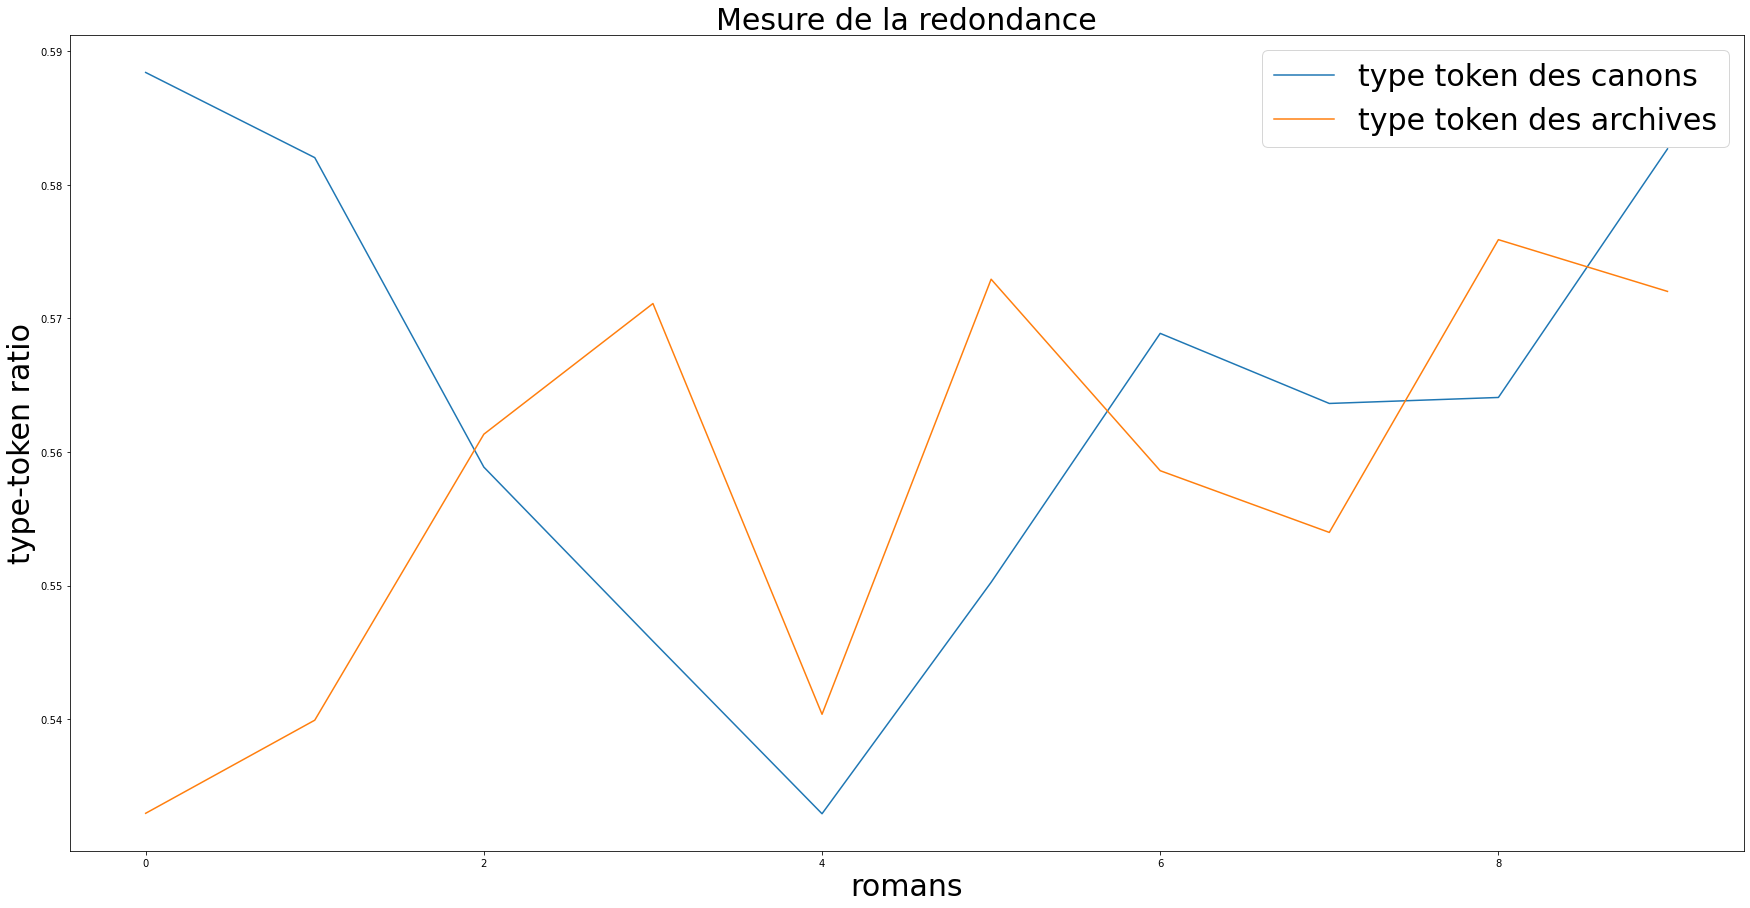

In [91]:
plt.figure(figsize=(30,15))
plt.plot(type_token_canon, label = 'type token des canons')
plt.plot(type_token_archive, label = 'type token des archives')
plt.ylabel('type-token ratio', fontsize=30)
plt.xlabel('romans', fontsize=30)
plt.title('Mesure de la redondance', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()

In [26]:
sum(type_token_canon)*100/len(type_token_canon)

frequence    1.638431
dtype: float64

In [27]:
sum(type_token_archive)*100/len(type_token_archive)

frequence    1.472202
dtype: float64

TEST

In [6]:
def word_freq(path):
    tag = 0
    nombre_token = 0
    words_freq = Counter()
    conteur = 0
    with open(path, encoding="utf8") as file:
        tree = etree.parse(file)
        tag = est_canon(tree)
        if tree.findall(".//p"):
            for paragraphe in tree.findall(".//p"):
                if paragraphe.text:
                    conteur+=len(paragraphe.text)
                    docs = nlp(paragraphe.text)
                    for token in docs:
                        if token.pos_ != "PUNCT" and token.pos_ != "SPACE":
                            nombre_token += 1
                            if token.text not in StopWords:
                                words_freq[token.lemma_] += 1
    print("Nombre de mots dans le texte : ", conteur)
    print("Nombre de tokens dans le texte : ", nombre_token)
    print("Nombre de lemmes dans le texte : ", len(words_freq))
    print("Nombre de lemmes totaux dans le texte : ", sum(words_freq.values()))
    return words_freq, nombre_token, tag, conteur, sum(words_freq.values())

In [9]:
canon = False
corpus = dict() # dictionnaire des dictionnaires de chaque texte
type_token_canon = []
type_token_archive = []
for doc in glob('test/*.xml'):
    doc_name = path.splitext(path.basename(doc))[0]
    print(doc_name)
    corpus[doc_name], len_doc, canon, lemmes, lemmes_totaux = word_freq(doc)
    moyenne_lemme = lemmes_totaux/len_doc
    if canon:
        type_token_canon.append(moyenne_lemme)
    else:
        type_token_archive.append(moyenne_lemme)

1828_Kock-Paul-de_Jean
Nombre de mots dans le texte :  570266
Nombre de tokens dans le texte :  104686
Nombre de lemmes dans le texte :  5875
Nombre de lemmes totaux dans le texte :  55794
1829_Hugo-Victor_Le-dernier-jour-d-un-condamne
Nombre de mots dans le texte :  193216
Nombre de tokens dans le texte :  36116
Nombre de lemmes dans le texte :  4038
Nombre de lemmes totaux dans le texte :  21251
1831_Balzac-Honore-de_La-Peau-de-chagrin-ed-Gosselin
Nombre de mots dans le texte :  570621
Nombre de tokens dans le texte :  97726
Nombre de lemmes dans le texte :  8229
Nombre de lemmes totaux dans le texte :  56880
1832_Sand-George_Indiana
Nombre de mots dans le texte :  535956
Nombre de tokens dans le texte :  98192
Nombre de lemmes dans le texte :  5909
Nombre de lemmes totaux dans le texte :  54877
1832_Vigny-Alfred-de_Stello
Nombre de mots dans le texte :  354237
Nombre de tokens dans le texte :  65185
Nombre de lemmes dans le texte :  6332
Nombre de lemmes totaux dans le texte :  3558

In [12]:
print(type_token_canon)

[0.5884095691660206, 0.5820354869737838, 0.5588744500570311, 0.5458464370637417, 0.5329321792743656, 0.5502525491184408, 0.5688829894211818, 0.5636374025083565, 0.5640865519717738, 0.5826887691808138]


In [13]:
print(type_token_archive)

[0.5329652484572913, 0.5399332847666884, 0.5613363985829501, 0.5711154473283259, 0.5403750219686625, 0.572936048056988, 0.5586051167446516, 0.5539861144361983, 0.5758964384224002, 0.572024156218387]


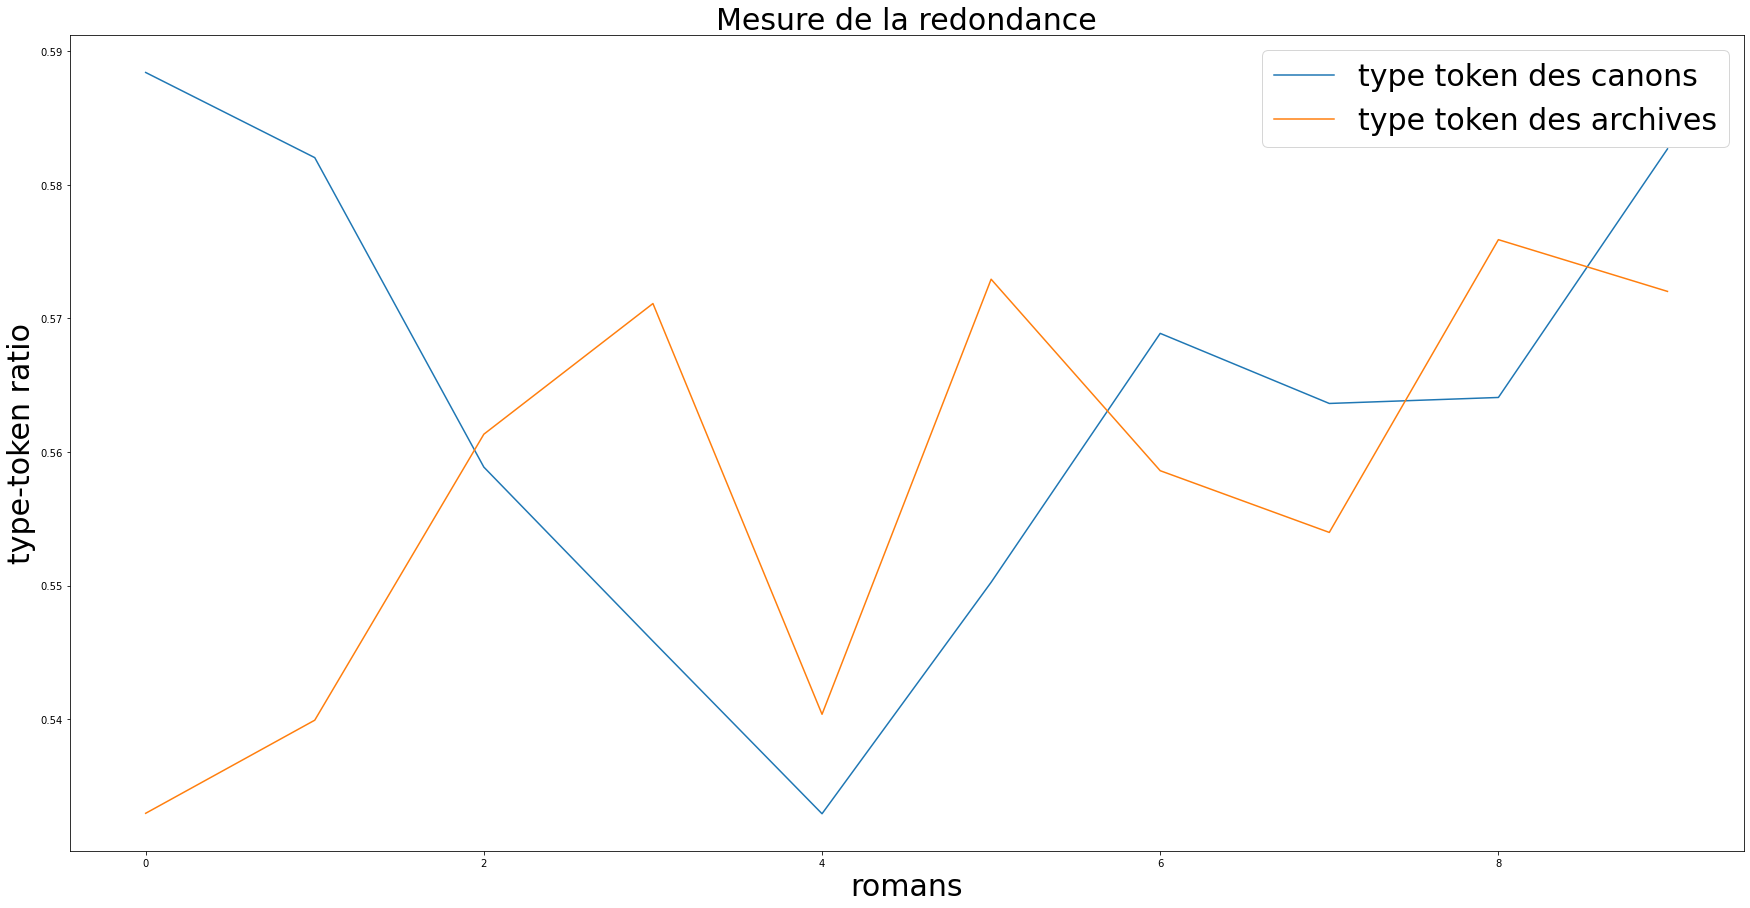

In [14]:
plt.figure(figsize=(30,15))
plt.plot(type_token_canon, label = 'type token des canons')
plt.plot(type_token_archive, label = 'type token des archives')
plt.ylabel('type-token ratio', fontsize=30)
plt.xlabel('romans', fontsize=30)
plt.title('Mesure de la redondance', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()

In [70]:
x = [1,2,3,4,5,6,7,8,9,10]

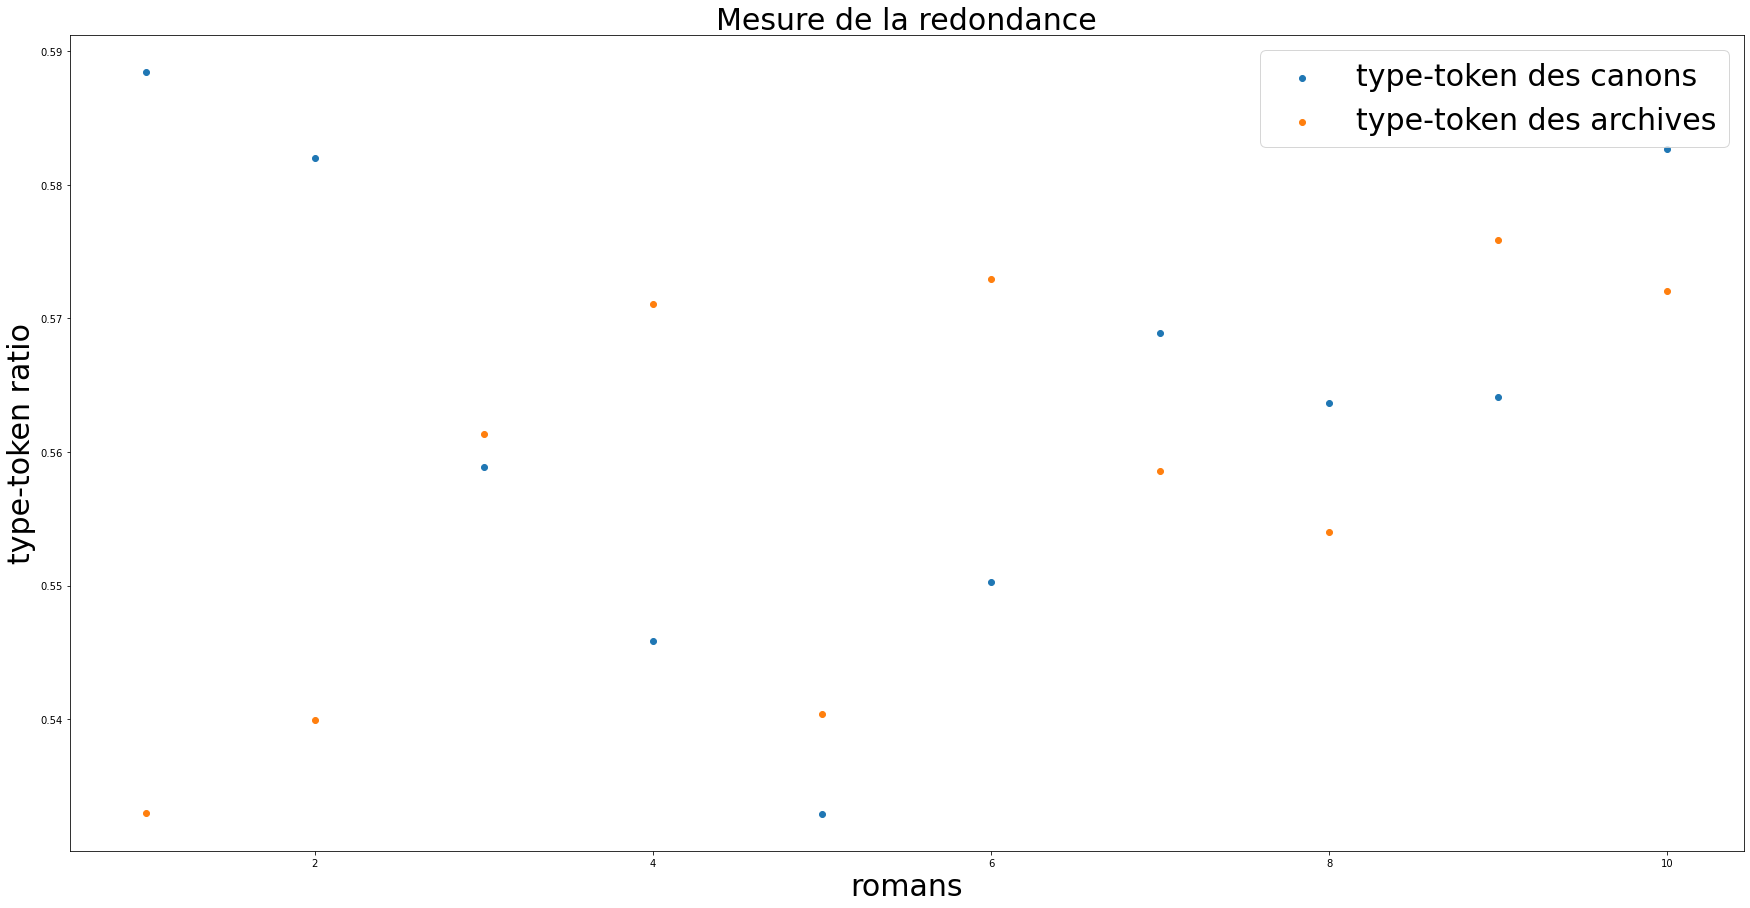

In [85]:
plt.figure(figsize=(30,15))
plt.scatter(x, type_token_canon, label = 'type-token des canons')
plt.scatter(x, type_token_archive, label = 'type-token des archives')
plt.ylabel('type-token ratio', fontsize=30)
plt.xlabel('romans', fontsize=30)
plt.title('Mesure de la redondance', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()